In [1]:
from google.colab import files
uploads=files.upload()

Saving soc-sign-bitcoinotc.csv to soc-sign-bitcoinotc.csv


In [2]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np

In [6]:
graph_data=pd.read_csv('/content/soc-sign-bitcoinotc.csv',names=['SOURCE', 'TARGET', 'RATING', 'TIME'])
print(graph_data.columns)

Index(['SOURCE', 'TARGET', 'RATING', 'TIME'], dtype='object')


In [7]:
print(graph_data)

       SOURCE  TARGET  RATING          TIME
0           6       2       4  1.289242e+09
1           6       5       2  1.289242e+09
2           1      15       1  1.289243e+09
3           4       3       7  1.289245e+09
4          13      16       8  1.289254e+09
...       ...     ...     ...           ...
35587    4499    1810       1  1.453612e+09
35588    2731    3901       5  1.453679e+09
35589    2731    4897       5  1.453679e+09
35590      13    1128       1  1.453680e+09
35591    1128      13       2  1.453684e+09

[35592 rows x 4 columns]


In [13]:
import networkx as nx

In [14]:
#making directed networkx graph 
nodes=list(set(graph_data['SOURCE'].values).union(set(graph_data['TARGET'].values)))
G=nx.DiGraph()
for node in nodes:
  G.add_node(node)
for src,target in zip(graph_data['SOURCE'].values,graph_data['TARGET'].values):
  G.add_edge(src,target)
print(G)

DiGraph with 5881 nodes and 35592 edges


In [15]:
page_rank_values=nx.pagerank(G) # getting page rank values

In [49]:
print("--------page rank values--------")
print(page_rank_values)

--------page rank values--------
{1: 0.005029048679852529, 2: 0.0009774710321327727, 3: 0.0003827789520076624, 4: 0.001289835811003076, 5: 9.29861627294045e-05, 6: 0.0007741085917228506, 7: 0.005912435786337965, 8: 9.40420469756542e-05, 9: 5.4899384011041e-05, 10: 0.00013403416569389068, 13: 0.004285772484391748, 15: 0.00032293239289585003, 16: 5.23506003793462e-05, 17: 0.0004244242583278969, 19: 0.000266867730032477, 20: 0.0002346557412892012, 21: 0.0006441925866757663, 23: 0.0006896469811648333, 25: 0.002060798656742606, 26: 0.00037046843223554905, 28: 0.00033990550841227836, 29: 0.0009314643278654528, 31: 7.229960098291021e-05, 32: 0.00016496088457537, 33: 0.0006405796494185482, 34: 9.384064646831807e-05, 35: 0.015107372805455366, 36: 0.000981221707925812, 37: 0.0003435503830252744, 39: 0.0006532796404355696, 41: 0.0024072028948341185, 44: 0.00010756711558909126, 45: 0.00029124956823957946, 46: 5.879979399223194e-05, 47: 7.652365224703115e-05, 51: 0.0006733880437096258, 52: 5.895873

In [50]:
hubs,authority=nx.hits(G)#getting hubs and authority score for each node
print("--------hub values--------")
print(hubs)
print("--------authority values--------")
print(authority)

--------hub values--------
{1: 0.004636831266948586, 2: 0.0007758275426393979, 3: -0.0, 4: 0.0015073564036747502, 5: 0.0002087994818831646, 6: 0.0014629173309573145, 7: 0.003094494268668363, 8: 0.00010813573337056307, 9: 0.00010813573337056307, 10: 0.00030136703888469367, 13: 0.004512775520459805, 15: 0.00030249489456763584, 16: -0.0, 17: 0.0006344243302864288, 19: 0.00037312180957712807, 20: -0.0, 21: 0.000304896157248639, 23: 0.00024820009799823644, 25: -0.0, 26: 0.00022634414151532015, 28: 0.00020107623038189592, 29: 0.0006104895970105332, 31: 0.00013506517045776205, 32: 0.00036205393276500487, 33: 0.0016035326932848596, 34: 0.00026271204713484937, 35: 0.00612501535732396, 36: 0.0005122552785621999, 37: 0.0002013665020616887, 39: 0.00039452519166175234, 41: 0.0025262511467515235, 44: 1.2300840624301512e-05, 45: 9.763109689428897e-05, 46: 7.963156749292736e-06, 47: 0.0001709948898514065, 51: 0.000790865167397409, 52: 1.493164808978886e-05, 53: 6.467323640917363e-05, 54: 0.00030911348

In [22]:
#making result dataframe
result_df=pd.DataFrame()
result_df['nodes']=nodes
pgr_list=[page_rank_values[nd] for nd in nodes]
hub_list=[hubs[nd] for nd in nodes]
auth_list=[authority[nd] for nd in nodes]
result_df['page_rank_score']=pgr_list
result_df['hub_score']=hub_list
result_df['authority_score']=auth_list
print(result_df)

      nodes  page_rank_score     hub_score  authority_score
0         1         0.005029  4.636831e-03     4.496190e-03
1         2         0.000977  7.758275e-04     5.890168e-04
2         3         0.000383 -0.000000e+00     5.475613e-04
3         4         0.001290  1.507356e-03     1.119703e-03
4         5         0.000093  2.087995e-04     1.697030e-04
...     ...              ...           ...              ...
5876   6000         0.000035  6.646890e-22    -1.381860e-20
5877   6002         0.000065 -0.000000e+00     2.763719e-20
5878   6003         0.000047 -0.000000e+00     2.131752e-06
5879   6004         0.000052 -0.000000e+00     1.130527e-04
5880   6005         0.000052 -0.000000e+00     1.130527e-04

[5881 rows x 4 columns]


In [46]:
#top 10 page rank score based nodes
pgr_df=result_df.sort_values(by='page_rank_score',inplace=False,ascending=False)
pgr_df.head(10)

,nodes,page_rank_score,hub_score,authority_score
26,35,0.015107,0.006125,0.004895
2587,2642,0.010816,0.006761,0.006366
1764,1810,0.006976,0.006779,0.005324
1981,2028,0.006776,0.005593,0.004734
6,7,0.005912,0.003094,0.002614
864,905,0.005372,0.006778,0.006058
1907,1953,0.005159,0.001808,0.002252
0,1,0.005029,0.004637,0.004496
4092,4172,0.004786,0.005109,0.004602
4115,4197,0.004672,0.004452,0.003880


In [25]:
#top 10 hub score based nodes
hub_df=result_df.sort_values(by='hub_score',inplace=False,ascending=False)
hub_df.head(10)

,nodes,page_rank_score,hub_score,authority_score
1764,1810,0.006976,0.006779,0.005324
864,905,0.005372,0.006778,0.006058
2587,2642,0.010816,0.006761,0.006366
26,35,0.015107,0.006125,0.004895
1981,2028,0.006776,0.005593,0.004734
2077,2125,0.003880,0.005189,0.003761
4206,4291,0.003114,0.005157,0.004306
4092,4172,0.004786,0.005109,0.004602
2338,2388,0.002634,0.004859,0.003831
3910,3988,0.002528,0.004834,0.001980


In [26]:
#top 10  authority score based nodes
auth_df=result_df.sort_values(by='authority_score',inplace=False,ascending=False)
auth_df.head(10)

,nodes,page_rank_score,hub_score,authority_score
2587,2642,0.010816,0.006761,0.006366
864,905,0.005372,0.006778,0.006058
1764,1810,0.006976,0.006779,0.005324
26,35,0.015107,0.006125,0.004895
1981,2028,0.006776,0.005593,0.004734
4092,4172,0.004786,0.005109,0.004602
0,1,0.005029,0.004637,0.004496
4206,4291,0.003114,0.005157,0.004306
1293,1334,0.003113,0.004702,0.004261
977,1018,0.004084,0.004560,0.003942


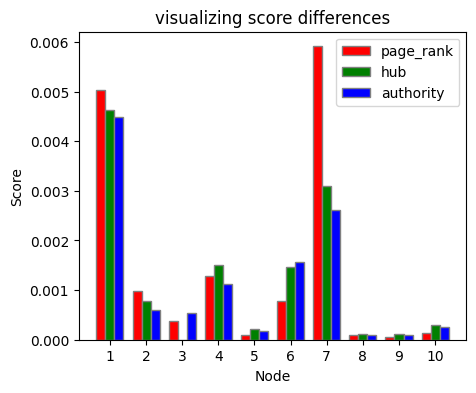

In [48]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig,ax = plt.subplots(figsize =(5, 4))
 
# set height of bar
page_rank = result_df['page_rank_score'].values
hub = result_df['hub_score'].values
auth = result_df['authority_score'].values
 
# Set position of bar on X axis
br1 = np.arange(len(page_rank[0:10]))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, page_rank[0:10], color ='r', width = barWidth,
        edgecolor ='grey', label ='page_rank')
plt.bar(br2, hub[0:10], color ='g', width = barWidth,
        edgecolor ='grey', label ='hub')
plt.bar(br3, auth[0:10], color ='b', width = barWidth,
        edgecolor ='grey', label ='authority')
 
# Adding Xticks
plt.xlabel('Node', fontsize = 10)
plt.ylabel('Score', fontsize = 10)
plt.xticks([r + barWidth for r in range(len(page_rank[0:10]))],
        nodes[0:10])
#fig.autofmt_xdate()
plt.legend()
plt.title("visualizing score differences")
plt.show()

The node having highest page rank score will have quality nodes as its neighbours and also a high in-degree

The node having highest hub score will have high out-degree. 

The node having highest authority score will have high in-degree.

